#### Create model based on cleaned data

#### Note - must run data cleaning and Matlab resampling prior to training

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import h5py

df = pd.read_csv('sensors.csv')
df.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'hours', 'minutes', 'seconds']

flow = pd.read_csv('flow.csv')
flow.columns = ['Flow']

df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds
0,0.448000,0.472000,0.448000,0.488889,0.000000,0.000000,0.000000,0.000000,14.0,58.0,56.452582
1,0.448000,0.476000,0.452000,0.488889,0.000000,0.217988,0.217988,0.000000,14.0,58.0,56.461756
2,0.442667,0.471979,0.453340,0.491852,-0.187120,-0.056650,0.185052,0.103955,14.0,58.0,56.471257
3,0.441992,0.467932,0.447968,0.493343,-0.141453,-0.180708,-0.020557,0.111506,14.0,58.0,56.482890
4,0.443208,0.468765,0.451247,0.494239,-0.063514,-0.083391,0.110181,0.107435,14.0,58.0,56.492348


In [42]:
flow.head()

,Flow
0,-0.130252
1,-0.227372
2,-0.154385
3,-0.181536
4,-0.150498


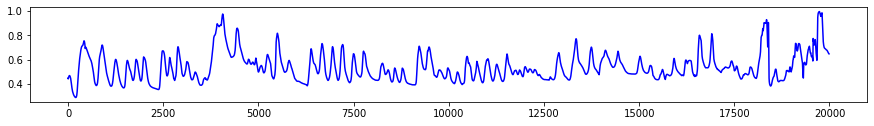

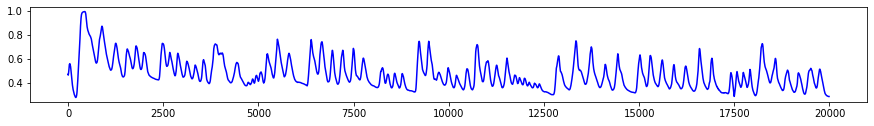

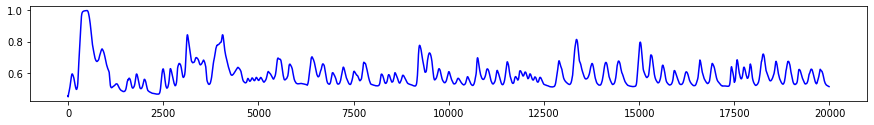

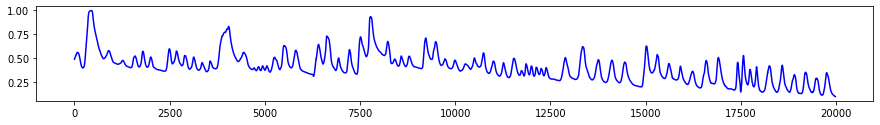

In [43]:
x = range(0, len(df))
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.plot(x, df['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.plot(x, df['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.plot(x, df['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.plot(x, df['4'], 'b')
plt.show()

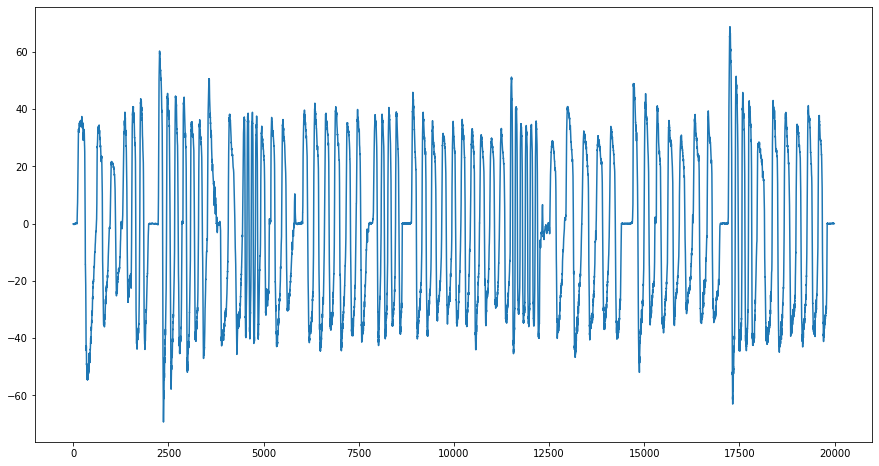

In [44]:
fig = plt.figure(figsize = (15, 8))
plt.plot(flow['Flow'])

In [45]:
def label_fix(label):
    if label < -10:
        return 0
    elif label > 10:
        return 1
    else:
        return 2

df['Class'] = flow['Flow'].apply(label_fix)

In [46]:
df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds,Class
0,0.448000,0.472000,0.448000,0.488889,0.000000,0.000000,0.000000,0.000000,14.0,58.0,56.452582,2
1,0.448000,0.476000,0.452000,0.488889,0.000000,0.217988,0.217988,0.000000,14.0,58.0,56.461756,2
2,0.442667,0.471979,0.453340,0.491852,-0.187120,-0.056650,0.185052,0.103955,14.0,58.0,56.471257,2
3,0.441992,0.467932,0.447968,0.493343,-0.141453,-0.180708,-0.020557,0.111506,14.0,58.0,56.482890,2
4,0.443208,0.468765,0.451247,0.494239,-0.063514,-0.083391,0.110181,0.107435,14.0,58.0,56.492348,2


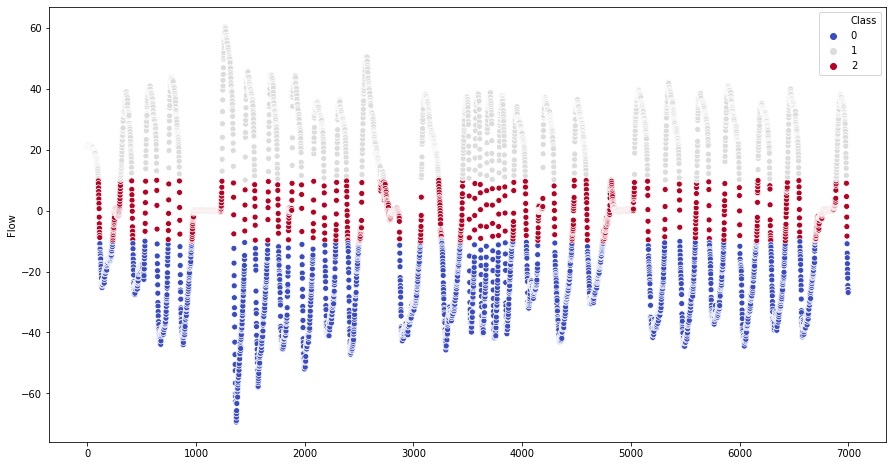

In [47]:
fig = plt.figure(figsize = (15, 8))
sns.scatterplot(y = flow['Flow'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

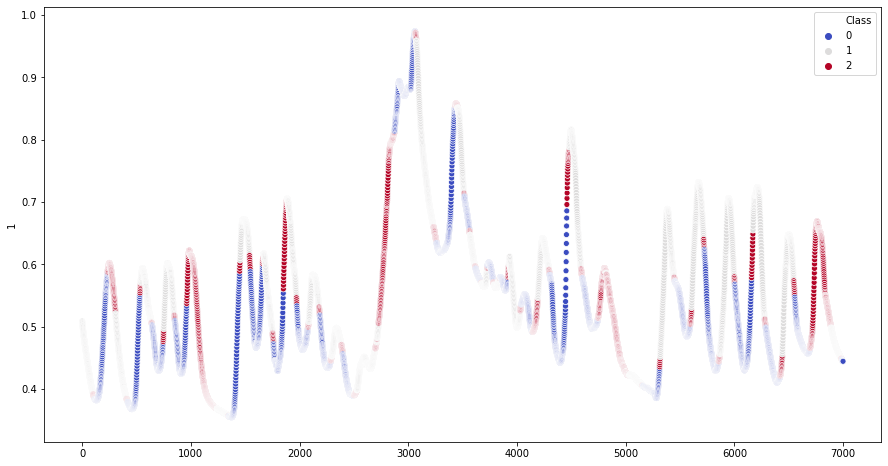

In [48]:
fig = plt.figure(figsize = (15, 8))
sns.scatterplot(y = df['1'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

In [49]:
df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds,Class
0,0.448000,0.472000,0.448000,0.488889,0.000000,0.000000,0.000000,0.000000,14.0,58.0,56.452582,2
1,0.448000,0.476000,0.452000,0.488889,0.000000,0.217988,0.217988,0.000000,14.0,58.0,56.461756,2
2,0.442667,0.471979,0.453340,0.491852,-0.187120,-0.056650,0.185052,0.103955,14.0,58.0,56.471257,2
3,0.441992,0.467932,0.447968,0.493343,-0.141453,-0.180708,-0.020557,0.111506,14.0,58.0,56.482890,2
4,0.443208,0.468765,0.451247,0.494239,-0.063514,-0.083391,0.110181,0.107435,14.0,58.0,56.492348,2


In [50]:
# Create the data matrix
X = df.drop('Class', axis = 1)
X.drop('hours', inplace = True, axis = 1)
X.drop('minutes', inplace = True, axis = 1)
X.drop('seconds', inplace = True, axis = 1)

# Create the classification matrix
y = df['Class']
y = pd.DataFrame(y, index = None, columns = ['Class'])

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)

In [51]:
# Develop keras sequential model with optimized parameters through grid search cv
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(100, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 150)               1350      
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               15100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [52]:
EPOCHS = 1000
model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/1000
13992/13992 [==============================] - 1s 36us/sample - loss: 1.0497 - acc: 0.4418
Epoch 2/1000
13992/13992 [==============================] - 0s 28us/sample - loss: 1.0224 - acc: 0.4918
Epoch 3/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.9942 - acc: 0.5267
Epoch 4/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.9615 - acc: 0.5518
Epoch 5/1000
13992/13992 [==============================] - 0s 28us/sample - loss: 0.9347 - acc: 0.5713
Epoch 6/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.9084 - acc: 0.5891
Epoch 7/1000
13992/13992 [==============================] - 0s 28us/sample - loss: 0.8890 - acc: 0.5993
Epoch 8/1000
13992/13992 [==============================] - 0s 28us/sample - loss: 0.8651 - acc: 0.6113
Epoch 9/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.8543 - acc: 0.6169
Epoch 10/1000
13992/13992 [==============================] - 0s 

13992/13992 [==============================] - 0s 27us/sample - loss: 0.5440 - acc: 0.7717
Epoch 80/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.5418 - acc: 0.7692
Epoch 81/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.5373 - acc: 0.7744
Epoch 82/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.5454 - acc: 0.7696
Epoch 83/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.5418 - acc: 0.7727
Epoch 84/1000
13992/13992 [==============================] - 0s 29us/sample - loss: 0.5400 - acc: 0.7724
Epoch 85/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.5329 - acc: 0.7779
Epoch 86/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.5338 - acc: 0.7772
Epoch 87/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.5296 - acc: 0.7792
Epoch 88/1000
13992/13992 [==============================] - 0s 27us/

13992/13992 [==============================] - 0s 27us/sample - loss: 0.4762 - acc: 0.8076
Epoch 157/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.4760 - acc: 0.8081
Epoch 158/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.4627 - acc: 0.8178
Epoch 159/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.4652 - acc: 0.8126
Epoch 160/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.4665 - acc: 0.8117
Epoch 161/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.4689 - acc: 0.8085
Epoch 162/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.4772 - acc: 0.8067
Epoch 163/1000
13992/13992 [==============================] - 0s 29us/sample - loss: 0.4688 - acc: 0.8112
Epoch 164/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.4607 - acc: 0.8114
Epoch 165/1000
13992/13992 [==============================] -

13992/13992 [==============================] - 0s 27us/sample - loss: 0.4366 - acc: 0.8293
Epoch 234/1000
13992/13992 [==============================] - 0s 28us/sample - loss: 0.4374 - acc: 0.8291
Epoch 235/1000
13992/13992 [==============================] - 0s 28us/sample - loss: 0.4347 - acc: 0.8240
Epoch 236/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.4414 - acc: 0.8285
Epoch 237/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.4292 - acc: 0.8307
Epoch 238/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.4356 - acc: 0.8303
Epoch 239/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.4367 - acc: 0.8268
Epoch 240/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.4277 - acc: 0.8311
Epoch 241/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.4291 - acc: 0.8295
Epoch 242/1000
13992/13992 [==============================] -

13992/13992 [==============================] - 0s 26us/sample - loss: 0.4162 - acc: 0.8401
Epoch 311/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.4002 - acc: 0.8430
Epoch 312/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3986 - acc: 0.8453
Epoch 313/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.4093 - acc: 0.8421
Epoch 314/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.4043 - acc: 0.8436
Epoch 315/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.4038 - acc: 0.8419
Epoch 316/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.4169 - acc: 0.8370
Epoch 317/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.4092 - acc: 0.8424
Epoch 318/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3946 - acc: 0.8436
Epoch 319/1000
13992/13992 [==============================] -

13992/13992 [==============================] - 0s 28us/sample - loss: 0.3950 - acc: 0.8503
Epoch 388/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3917 - acc: 0.8506
Epoch 389/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3824 - acc: 0.8524
Epoch 390/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3946 - acc: 0.8513
Epoch 391/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3883 - acc: 0.8493
Epoch 392/1000
13992/13992 [==============================] - 0s 30us/sample - loss: 0.3933 - acc: 0.8479
Epoch 393/1000
13992/13992 [==============================] - 0s 28us/sample - loss: 0.3903 - acc: 0.8482
Epoch 394/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3922 - acc: 0.8448
Epoch 395/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3811 - acc: 0.8531
Epoch 396/1000
13992/13992 [==============================] -

13992/13992 [==============================] - 0s 27us/sample - loss: 0.3771 - acc: 0.8536
Epoch 465/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3808 - acc: 0.8569
Epoch 466/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3683 - acc: 0.8586
Epoch 467/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3763 - acc: 0.8526
Epoch 468/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3776 - acc: 0.8551
Epoch 469/1000
13992/13992 [==============================] - 0s 28us/sample - loss: 0.3764 - acc: 0.8545
Epoch 470/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3813 - acc: 0.8533
Epoch 471/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3751 - acc: 0.8551
Epoch 472/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3752 - acc: 0.8547
Epoch 473/1000
13992/13992 [==============================] -

13992/13992 [==============================] - 0s 27us/sample - loss: 0.3551 - acc: 0.8681
Epoch 542/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3684 - acc: 0.8588
Epoch 543/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3742 - acc: 0.8598
Epoch 544/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3600 - acc: 0.8659
Epoch 545/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3702 - acc: 0.8587
Epoch 546/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3688 - acc: 0.8588
Epoch 547/1000
13992/13992 [==============================] - 0s 28us/sample - loss: 0.3559 - acc: 0.8644
Epoch 548/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3644 - acc: 0.8636
Epoch 549/1000
13992/13992 [==============================] - 0s 29us/sample - loss: 0.3632 - acc: 0.8631
Epoch 550/1000
13992/13992 [==============================] -

13992/13992 [==============================] - 0s 27us/sample - loss: 0.3514 - acc: 0.8676
Epoch 619/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3425 - acc: 0.8689
Epoch 620/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3595 - acc: 0.8637
Epoch 621/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3592 - acc: 0.8633
Epoch 622/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3526 - acc: 0.8629
Epoch 623/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3590 - acc: 0.8649
Epoch 624/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3578 - acc: 0.8668
Epoch 625/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3517 - acc: 0.8679
Epoch 626/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3479 - acc: 0.8656
Epoch 627/1000
13992/13992 [==============================] -

13992/13992 [==============================] - 0s 27us/sample - loss: 0.3555 - acc: 0.8662
Epoch 696/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3498 - acc: 0.8668
Epoch 697/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3433 - acc: 0.8729
Epoch 698/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3481 - acc: 0.8711
Epoch 699/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3409 - acc: 0.8740
Epoch 700/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3496 - acc: 0.8702
Epoch 701/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3376 - acc: 0.8704
Epoch 702/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3483 - acc: 0.8691
Epoch 703/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3448 - acc: 0.8706
Epoch 704/1000
13992/13992 [==============================] -

13992/13992 [==============================] - 0s 27us/sample - loss: 0.3468 - acc: 0.8709
Epoch 773/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3352 - acc: 0.8719
Epoch 774/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3533 - acc: 0.8636
Epoch 775/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3478 - acc: 0.8691
Epoch 776/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3450 - acc: 0.8706
Epoch 777/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3497 - acc: 0.8688
Epoch 778/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3341 - acc: 0.8745
Epoch 779/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3263 - acc: 0.8767
Epoch 780/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3334 - acc: 0.8763
Epoch 781/1000
13992/13992 [==============================] -

13992/13992 [==============================] - 0s 26us/sample - loss: 0.3335 - acc: 0.8793
Epoch 850/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3437 - acc: 0.8724
Epoch 851/1000
13992/13992 [==============================] - 0s 28us/sample - loss: 0.3308 - acc: 0.8764
Epoch 852/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3426 - acc: 0.8693
Epoch 853/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3389 - acc: 0.8720
Epoch 854/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3365 - acc: 0.8712
Epoch 855/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3357 - acc: 0.8753
Epoch 856/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3220 - acc: 0.8756
Epoch 857/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3307 - acc: 0.8745
Epoch 858/1000
13992/13992 [==============================] -

13992/13992 [==============================] - 0s 28us/sample - loss: 0.3383 - acc: 0.8716
Epoch 927/1000
13992/13992 [==============================] - 0s 27us/sample - loss: 0.3364 - acc: 0.8747
Epoch 928/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3338 - acc: 0.8756
Epoch 929/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3157 - acc: 0.8819
Epoch 930/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3283 - acc: 0.8760
Epoch 931/1000
13992/13992 [==============================] - 0s 28us/sample - loss: 0.3200 - acc: 0.8782
Epoch 932/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3324 - acc: 0.8768
Epoch 933/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3315 - acc: 0.8776
Epoch 934/1000
13992/13992 [==============================] - 0s 26us/sample - loss: 0.3321 - acc: 0.8759
Epoch 935/1000
13992/13992 [==============================] -

In [53]:
# Scoring the model on testing data from same dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)

final_pred = []
for score in range(0, len(predictions)):
    final_pred.append(np.argmax(predictions[score]))
    
print(classification_report(y_test, final_pred))

5997/5997 [==============================] - 0s 19us/sample - loss: 0.1718 - acc: 0.9460
Test accuracy: 0.945973
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2557
           1       0.94      0.97      0.95      2267
           2       0.93      0.85      0.89      1173

    accuracy                           0.95      5997
   macro avg       0.94      0.93      0.94      5997
weighted avg       0.95      0.95      0.95      5997



#### Testing Dataset

#### Save TFLite Model

In [34]:
keras_file = "model_4.h5"

In [35]:
keras.models.save_model(model, keras_file)

In [36]:
converter = tf.lite.TocoConverter.from_keras_model_file('model_4.h5')

In [20]:
tflite_model = converter.convert()

In [37]:
open("model_4.tflite", "wb").write(tflite_model)

37592